  <h2>Impact of Cambridge Analytica Scandal on Facebook Stock Price</h2>

  <h3>Cambridge Analytica's Actions:</h3>
  <ul>
    <li>Exploited Facebook user data for years.</li>
    <li>Notably used in the 2016 United States Election.</li>
  </ul>

  <h3>Timeline of Events:</h3>
  <ul>
    <li><strong>March 17th, 2018:</strong> New York Times, The Guardian, and The Observer (working with a former Cambridge Analytica employee) break the story.</li>
    <li><strong>April 10th, 2018:</strong> Mark Zuckerberg testifies before Congress on the scandal.</li>
    <li><strong>July 2018:</strong> Facebook fined over 5 billion euros by both UK and US governments.</li>
  </ul>

  <h3>Google's Causal Impact:</h3>
  <p>Investigates the causal relationship between the scandal and Facebook stock price.</p>

In [14]:
import yfinance as yf
import seaborn as sns
from causalimpact import CausalImpact

In [2]:
# Define pre and post period dates
start = '2015-12-28'
training_end = '2018-03-05'
treatment_start = '2018-03-12'
end = '2018-07-16'
end_stock = '2018-07-17'

# Get stock data
stocks = ['Meta','WMT','DIS','BMW.DE','NVS','GS','GE','KHC','MCD','CARL-B.CO']

df = yf.download(stocks,
                start=start,
                end=end_stock,
                interval='1wk')

[*********************100%%**********************]  10 of 10 completed


In [3]:
# Getting ont the useful data
df_filtered = df.iloc[:,:10]

df_filtered.columns = df_filtered.columns.droplevel()

df_filtered.head()

,BMW.DE,CARL-B.CO,DIS,GE,GS,KHC,MCD,META,NVS,WMT
Date,,,,,,,,,,
2015-12-28,64.783699,509.867371,98.814964,167.434570,153.509109,52.110069,97.066406,104.660004,57.095676,52.198662
2016-01-04,55.367729,494.467346,93.332558,152.921783,139.634308,50.978447,94.880913,97.330002,54.122776,54.106083
2016-01-11,51.771210,442.440002,88.301529,153.136780,132.539322,49.560417,94.634415,94.970001,53.240200,52.735134
2016-01-18,52.892639,449.931946,91.122673,151.792984,133.603989,53.277447,97.280029,97.940002,54.574020,53.382298
2016-01-25,50.868771,481.148285,90.107056,156.415604,137.607117,55.905865,101.700348,112.209999,51.740479,56.507393


<Axes: xlabel='Date'>

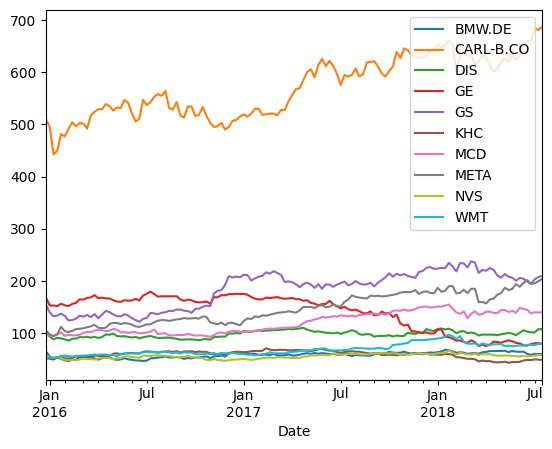

In [4]:
# Plotting data

df_filtered.plot()

<Axes: >

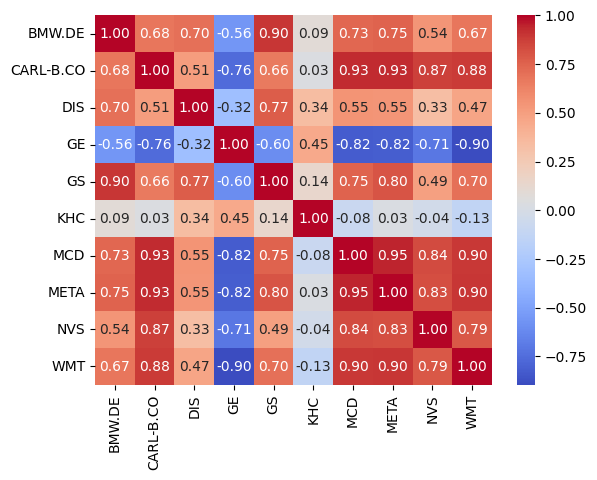

In [6]:
# Create dataset with training period only
df_cor = df_filtered[df_filtered.index <= treatment_start]

# Correlation Matix
sns.heatmap(df_cor.corr(), annot=True, cmap="coolwarm", fmt=".2f")

C:\Users\Rafael_Fagundes\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
C:\Users\Rafael_Fagundes\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: priod_level_sd, standardize, nseasons. After release 0.14, this will raise.
  warnings.warn(
C:\Users\Rafael_Fagundes\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rafael_Fagund

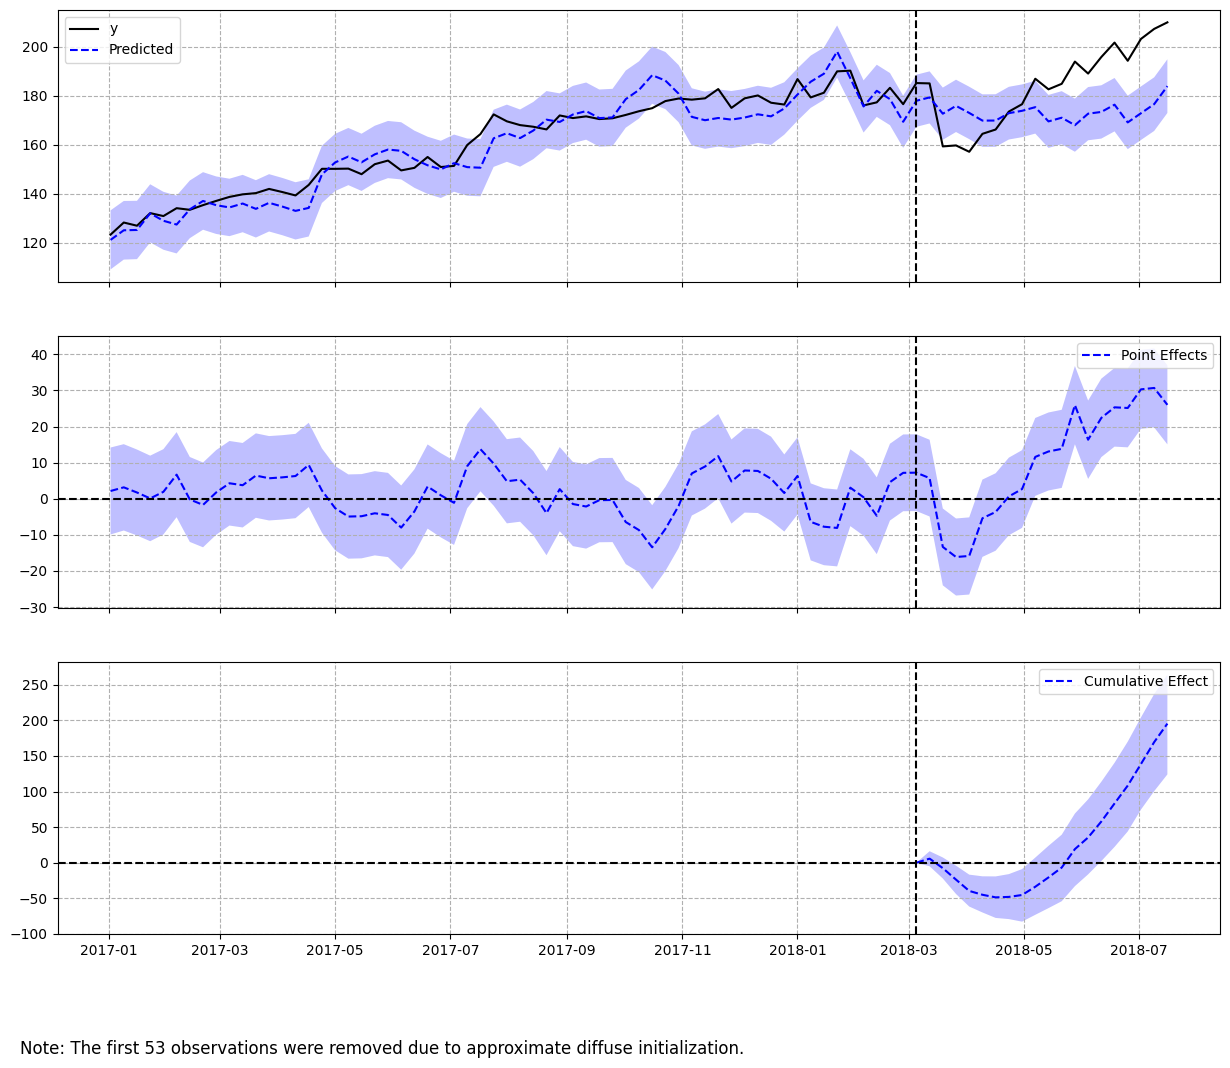

In [17]:
# Create dataset with most correlated stocks

df_final = df_filtered[['META','CARL-B.CO', 'GS', 'MCD', 'NVS', 'WMT']]

# Create pre and post period
pre_period = [start, training_end]
post_period = [treatment_start, end]

# Create Causal Impact Analysis
impact = CausalImpact(data = df_final, 
                      pre_period = pre_period, 
                      post_period = post_period,
                      nseasons = [{'period': 52}],
                      priod_level_sd = None)

# Interpret the results
impact.plot()

In [19]:
print(impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    183.82             3492.6
Prediction (s.d.)         173.54 (1.88)      3297.23 (35.77)
95% CI                    [169.91, 177.29]   [3228.38, 3368.59]

Absolute effect (s.d.)    10.28 (1.88)       195.37 (35.77)
95% CI                    [6.53, 13.91]      [124.01, 264.22]

Relative effect (s.d.)    5.93% (1.08%)      5.93% (1.08%)
95% CI                    [3.76%, 8.01%]     [3.76%, 8.01%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


  <h2>Conclusion:</h2>

  <h2>Average Actual Impact:</h2>
  <p>The actual average stock price increased by 183.82 units during the post-period, with a cumulative impact of 3492.6 units.</p>

  <h2>Average Predicted Impact:</h2>
  <p>The predicted average stock price without the scandal was 173.54 units, with a cumulative predicted impact of 3297.23 units. The standard deviation of the prediction is 1.88 units.</p>

  <h2>95% Confidence Interval (CI):</h2>
  <p>The 95% CI for the actual impact is [169.91, 177.29], and for the absolute effect is [6.53, 13.91].</p>

  <h2>Absolute Effect:</h2>
  <p>The actual impact was 10.28 units higher than the predicted impact, with a standard deviation of 1.88 units.</p>

  <h2>Relative Effect:</h2>
  <p>The relative effect, expressed as a percentage, is 5.93%. This indicates that the stock price increased by approximately 5.93% more than what was predicted, with a standard deviation of 1.08%.</p>

  <h2>Posterior Tail-area Probability (p):</h2>
  <p>The p-value is reported as 0.0, indicating a statistically significant impact.</p>

  <h2>Posterior Probability of a Causal Effect:</h2>
  <p>The posterior probability of a causal effect is 100%, suggesting a strong likelihood that the Cambridge Analytica scandal had a causal impact on the Facebook stock price.</p>